데이터셋이 순수 이미지 데이터라면?

In [3]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image

# 이미지 데이터셋 경로
image_paths = ['./path/to/images/' + x for x in os.listdir('./path/to/images/')]

# 데이터셋을 학습용과 테스트용으로 분할
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

# 이미지 전처리를 위한 변환 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 사이즈 조정
    transforms.ToTensor(),          # 이미지를 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 사용자 정의 데이터셋 클래스
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert('RGB')  # 이미지를 RGB로 변환
        if self.transform:
            image = self.transform(image)
        return image

# 데이터셋 객체 생성
train_dataset = CustomDataset(train_paths, transform=transform)
test_dataset = CustomDataset(test_paths, transform=transform)

# DataLoader 객체 생성
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)


FileNotFoundError: [Errno 2] No such file or directory: './path/to/images/'

# Dataset load

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#transforms.Normalize(mean, std)
#각 채널 RGB에 대한 mean, std라서 각 3개씩

batch_size = 4

#num_workers : 병렬 프로세스 수
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, num_workers =2)

classes = ('plane', 'car','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 45244790.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


check several samples from the training set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
  img = img / 2 + 0.5 #[-1,1]로 정규화된 데이터 다시 비정규화[0,1]
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0))) #(채널, 높이, 너비) 형식으로 저장
  plt.show()

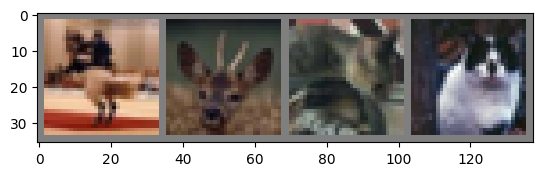

horse deer  cat  cat


In [ ]:
# 이제 반복자로부터 데이터를 가져와 확인해 보세요.
dataiter = iter(trainloader)
for images, labels in dataiter:
    imshow(torchvision.utils.make_grid(images))
    print(''.join('%5s'%classes[labels[j]] for j in range(batch_size)))
    break  # 첫 번째 배치만 확인하고 루프를 멈춥니다.

# Decine a Convolutional Neural Network

In [ ]:
for image, label in trainloader:
  print("이미지 크기 : ", image.size())
  print("라벨 크기(배치 개수랑 같아야 됨) : ", label.size())
  break

이미지 크기 :  torch.Size([4, 3, 32, 32])
라벨 크기(배치 개수랑 같아야 됨) :  torch.Size([4])


In [ ]:
nn.Conv2d

torch.nn.modules.conv.Conv2d

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.pool = nn.MaxPool2d(2,2)
    self.f1 = nn.Linear(16*5*5, 120)
    self.f2 = nn.Linear(120, 84)
    self.f3 = nn.Linear(84, 10) #최종 10개 클래스

  def forward(self, x): #input : 3x32x32
    x = self.pool(F.relu(self.conv1(x))) #6,14,14
    x = self.pool(F.relu(self.conv2(x))) #16, 5, 5
    x = torch.flatten(x, 1) #flatten al dimensions except batch
    x = F.relu(self.f1(x))
    x = F.relu(self.f2(x))
    x = self.f3(x) #마지막에는 relu x
    return x

net = Net()

# Define a loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-2)


# Train the network

In [ ]:
net.train()

for epoch in range(3): #loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    #get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    optimizer.zero_grad() #zero the parameter gradients

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    #print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: #print every 2000 mini-batches
      print('[%d, %5d] loss: %3f'%
            (epoch + 1, i+1, running_loss / 2000))
      running_loss = 0.0


[1,  2000] loss: 1.862988
[1,  4000] loss: 1.602810
[1,  6000] loss: 1.522008
[1,  8000] loss: 1.477132
[1, 10000] loss: 1.421722
[1, 12000] loss: 1.409493
[2,  2000] loss: 1.324704
[2,  4000] loss: 1.312454
[2,  6000] loss: 1.286886
[2,  8000] loss: 1.288663
[2, 10000] loss: 1.275275
[2, 12000] loss: 1.266652


adamw : 1.26652

# Test the network on the test data

Performance test on some specific samples

The volume depth of output is preserved

In [ ]:
dataiter = iter(testloader)

try:
    images, labels = next(iter(testloader))
    # 원하는 작업 수행
except StopIteration:
    pass  # 더 이상의 데이터가 없을 때 처리할 내용# 모델을 평가 모드로 설정합니다.

net.eval()

correct = 0
total = 0
# 테스트 시에는 기울기를 계산할 필요가 없으므로, no_grad()를 사용합니다.
with torch.no_grad():
    for images, labels in testloader:
        # 모델에 이미지를 전달하여 출력을 계산합니다.
        outputs = net(images)
        # 가장 높은 값(에너지)을 가진 분류를 선택합니다.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 전체 테스트 데이터셋에 대한 모델의 정확도를 출력합니다.
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 56 %


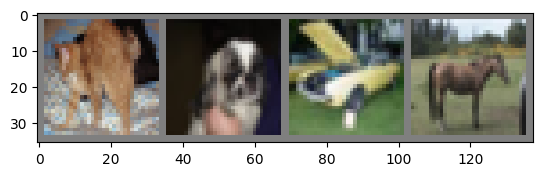

GroundTruth:    cat  dog  carhorse


In [ ]:
#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%5s'%classes[labels[j]] for j in range(4)))

In [ ]:
# 모델을 평가 모드로 설정합니다.
net.eval()

correct = 0
total = 0
# 테스트 시에는 기울기를 계산할 필요가 없으므로, no_grad()를 사용합니다.
with torch.no_grad():
    for images, labels in testloader:
        # 모델에 이미지를 전달하여 출력을 계산합니다.
        outputs = net(images)
        # 가장 높은 값(에너지)을 가진 분류를 선택합니다.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 전체 테스트 데이터셋에 대한 모델의 정확도를 출력합니다.
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 56 %
